In [1]:
import pandas as pd
train_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv"
test_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv"

# Load CSV files into pandas DataFrames
train_df = pd.read_csv(train_file)
test_df=pd.read_csv(test_file)

# Preprocessing and Tokenizing for DL Models

In [2]:
import pandas as pd

# Function to map original labels to binary values
def map_labels(df):
    label_mapping = {'__label__0': 0, '__label__1': 1}
    if 'label' in df.columns:
        df['label'] = df['label'].map(label_mapping)
    return df

# Function to ensure text column is string type and handle missing values
def preprocess_text_column(df):
    df['text'] = df['text'].fillna('').astype(str)
    return df
    
# Apply functions to preprocess train_df and test_df
train_df = map_labels(train_df)
test_df = map_labels(test_df)

train_df = preprocess_text_column(train_df)
test_df = preprocess_text_column(test_df)


In [3]:
import pandas as pd

# Function to convert text column to lowercase
def convert_to_lower(df, text):
    df[text] = df[text].str.lower()
    return df

# File paths
train_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv"
test_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv"

# Load CSV files into pandas DataFrames
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

# Apply convert_to_lower function to 'text' column in train_df and test_df
train_df = convert_to_lower(train_df, 'text')
test_df = convert_to_lower(test_df, 'text')

# Example of using the modified train_df and test_df
print("Modified train_df:")
print(train_df.head())

print("\nModified test_df:")
print(test_df.head())


Modified train_df:
                                                text  hd  cv  vo  label
0  he most likely converted to islam due to his n...   0   0   0      0
1  so ford lied about being a psychologist. recor...   0   0   0      0
2     jobs. education. ending abuse of nation. ca43.   0   0   0      0
3  i share a lot of your values, & like many who ...   0   0   0      0
4  i am so ready to get back to blogging! www.ben...   0   0   0      0

Modified test_df:
                                                text  hd  cv  vo  label
0  https://www.youtube.com/watch?v=kacwpkaktak a ...   0   0   0      0
1  very nice! i tend to get tired of the constant...   0   0   0      0
2        watch today. https://circumcisionmovie.com/   0   0   0      0
3  " thinking venues " first color layer blocking...   0   0   0      0
4  what about death penalty for perpetrators  and...   0   0   0      0


In [4]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to tokenize text data
def tokenize_texts(train_texts, test_texts, num_words=None):
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(train_texts)
    
    X_train_seq = tokenizer.texts_to_sequences(train_texts)
    X_test_seq = tokenizer.texts_to_sequences(test_texts)
    
    return tokenizer, X_train_seq, X_test_seq

# Function to pad sequences
def pad_sequences_data(X_train_seq, X_test_seq, max_sequence_length):
    X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
    X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)
    return X_train_padded, X_test_padded

# Function to extract labels
def extract_labels(train_data, test_data):
    y_train = train_data['label'].values
    y_test = test_data['label'].values
    return y_train, y_test

# Example usage
tokenizer, X_train_seq, X_test_seq = tokenize_texts(train_df['text'], test_df['text'], num_words=5000)
X_train_padded, X_test_padded = pad_sequences_data(X_train_seq, X_test_seq, max_sequence_length=100)
y_train, y_test = extract_labels(train_df, test_df)

# Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) play a crucial role in text classification, providing a robust and efficient approach to understanding and categorizing text data. While traditionally associated with image processing, CNNs have proven to be highly effective in handling the intricacies of natural language processing (NLP) tasks.

Epoch 1/5


C:\Users\BHARGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


276/276 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.6009 - loss: 0.6495 - val_accuracy: 0.8274 - val_loss: 0.4645
Epoch 2/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.8333 - loss: 0.4217 - val_accuracy: 0.8076 - val_loss: 0.4553
Epoch 3/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.9052 - loss: 0.2589 - val_accuracy: 0.7958 - val_loss: 0.5087
Epoch 4/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - accuracy: 0.9478 - loss: 0.1440 - val_accuracy: 0.8480 - val_loss: 0.5214
Epoch 5/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 27s 96ms/step - accuracy: 0.9638 - loss: 0.0805 - val_accuracy: 0.8392 - val_loss: 0.7309
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7888 - loss: 0.4835
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Confusion Matrix:
[[3892  911]
 [ 206  501]]
CNN Model Classification Report:
               precision    recall  f1-score   support

     Class 0       0.95      0.81      0.87      4803
     Class 1       0.35      0.71      0.47       707

    

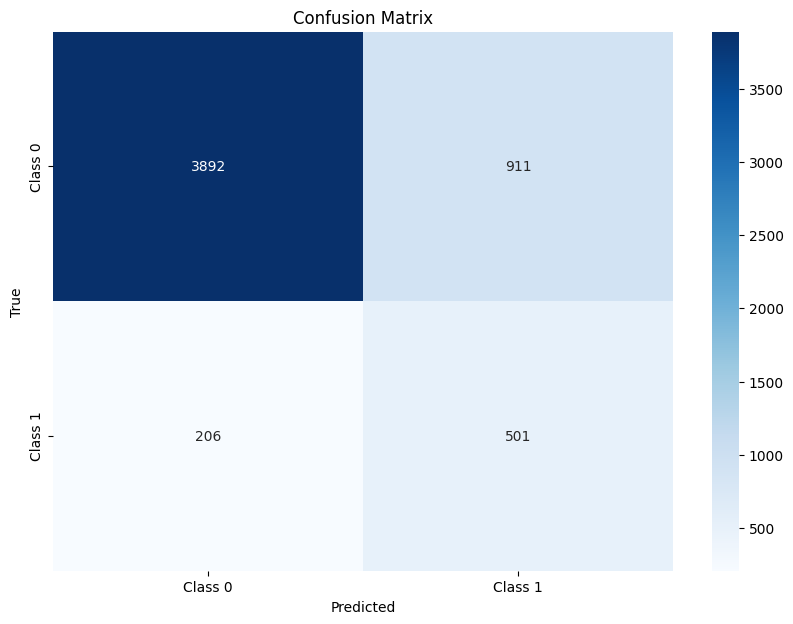

In [10]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv")
test_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv")

# Extract texts and labels
X = train_df['text'].values
y = train_df['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize texts
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])

# Pad sequences
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Extract test labels
y_test = test_df['label'].values

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
cnn_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_val_padded, y_val), callbacks=[early_stopping], class_weight=class_weights_dict)

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_padded, y_test)
cnn_y_pred = cnn_model.predict(X_test_padded)
cnn_y_pred_classes = (cnn_y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, cnn_y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
cnn_report = classification_report(y_test, cnn_y_pred_classes, target_names=['Class 0', 'Class 1'])
print("CNN Model Classification Report:\n", cnn_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Alteration-1

Epoch 1/5


C:\Users\BHARGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


276/276 ━━━━━━━━━━━━━━━━━━━━ 342s 1s/step - accuracy: 0.5896 - loss: 0.6673 - val_accuracy: 0.7663 - val_loss: 0.6167
Epoch 2/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.7931 - loss: 0.5456 - val_accuracy: 0.8063 - val_loss: 0.4689
Epoch 3/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.8134 - loss: 0.4705 - val_accuracy: 0.7330 - val_loss: 0.5763
Epoch 4/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.8301 - loss: 0.4096 - val_accuracy: 0.7629 - val_loss: 0.5065
Epoch 5/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 408s 1s/step - accuracy: 0.8622 - loss: 0.3569 - val_accuracy: 0.8072 - val_loss: 0.4922
173/173 ━━━━━━━━━━━━━━━━━━━━ 26s 151ms/step - accuracy: 0.8009 - loss: 0.4877
173/173 ━━━━━━━━━━━━━━━━━━━━ 26s 147ms/step
Confusion Matrix:
[[3975  828]
 [ 264  443]]
CNN Model Classification Report:
               precision    recall  f1-score   support

     Class 0       0.94      0.83      0.88      4803
     Class 1       0.35      0.63      0.45       707

    a

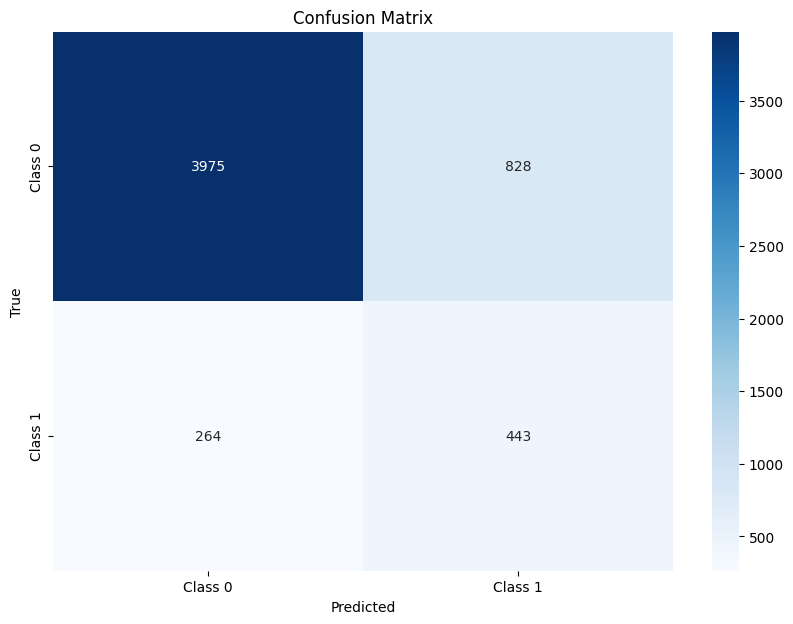

In [6]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv")
test_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv")

# Extract texts and labels
X = train_df['text'].values
y = train_df['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize texts
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])

# Pad sequences
max_len = 500  # Increased maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Extract test labels
y_test = test_df['label'].values

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define CNN model with the required modifications
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=1000, output_dim=128, input_length=max_len))  # Increased size to 128 for embedding
cnn_model.add(Conv1D(256, 5, activation='relu'))  # First Conv1D layer with 256 filters
cnn_model.add(MaxPooling1D(2))  # MaxPooling1D with pool size of 2
cnn_model.add(Conv1D(128, 5, activation='relu'))  # Second Conv1D layer with 128 filters
cnn_model.add(MaxPooling1D(2))  # MaxPooling1D with pool size of 2
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))  # Single Dense layer with 64 units
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
cnn_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_val_padded, y_val), callbacks=[early_stopping], class_weight=class_weights_dict)

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_padded, y_test)
cnn_y_pred = cnn_model.predict(X_test_padded)
cnn_y_pred_classes = (cnn_y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, cnn_y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
cnn_report = classification_report(y_test, cnn_y_pred_classes, target_names=['Class 0', 'Class 1'])
print("CNN Model Classification Report:\n", cnn_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Alteration-2

C:\Users\BHARGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 263s 942ms/step - accuracy: 0.6085 - loss: 0.6568 - val_accuracy: 0.8131 - val_loss: 0.4639
Epoch 2/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 267s 966ms/step - accuracy: 0.8004 - loss: 0.5145 - val_accuracy: 0.8056 - val_loss: 0.4744
Epoch 3/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 248s 897ms/step - accuracy: 0.8215 - loss: 0.4393 - val_accuracy: 0.7899 - val_loss: 0.4913
Epoch 4/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 258s 935ms/step - accuracy: 0.8488 - loss: 0.3668 - val_accuracy: 0.7799 - val_loss: 0.5090
Epoch 5/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 262s 951ms/step - accuracy: 0.8900 - loss: 0.2865 - val_accuracy: 0.8022 - val_loss: 0.5235
173/173 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.8064 - loss: 0.4773
173/173 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step
Confusion Matrix:
[[4028  775]
 [ 269  438]]
CNN Model Classification Report:
               precision    recall  f1-score   support

     Class 0       0.94      0.84      0.89      4803
     Class 1       0.36      0.62  

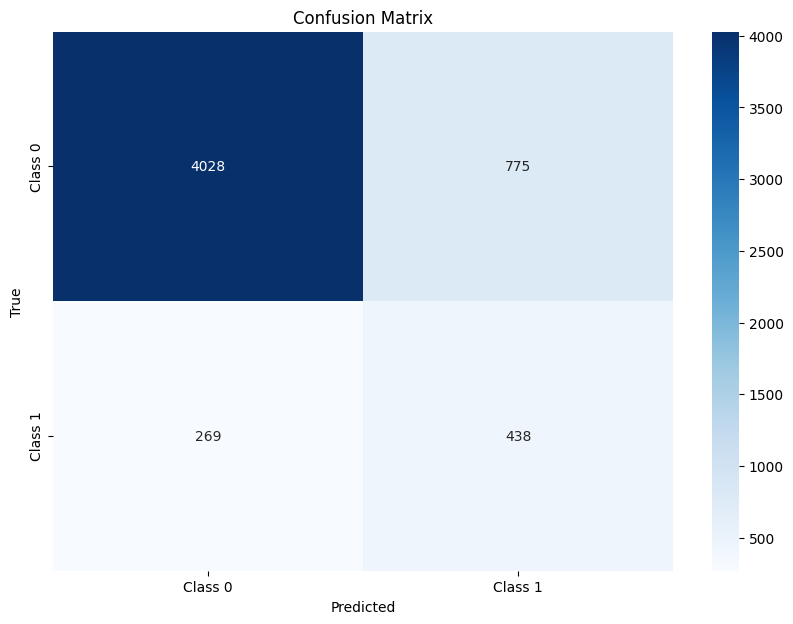

In [5]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv")
test_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv")

# Extract texts and labels
X = train_df['text'].values
y = train_df['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize texts
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])

# Pad sequences
max_len = 500  # Increased maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Extract test labels
y_test = test_df['label'].values

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define CNN model with the required modifications
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=1000, output_dim=128, input_length=max_len))  # Increased size to 128 for embedding
cnn_model.add(Conv1D(256, 5, activation='relu'))  # First Conv1D layer with 256 filters
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Conv1D(128, 5, activation='relu'))  # Second Conv1D layer with 128 filters
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))  # Single Dense layer with 64 units
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
cnn_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_val_padded, y_val), callbacks=[early_stopping], class_weight=class_weights_dict)

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_padded, y_test)
cnn_y_pred = cnn_model.predict(X_test_padded)
cnn_y_pred_classes = (cnn_y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, cnn_y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
cnn_report = classification_report(y_test, cnn_y_pred_classes, target_names=['Class 0', 'Class 1'])
print("CNN Model Classification Report:\n", cnn_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Alteration-3

Epoch 1/5


C:\Users\BHARGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


276/276 ━━━━━━━━━━━━━━━━━━━━ 77s 270ms/step - accuracy: 0.6449 - loss: 0.6449 - val_accuracy: 0.8419 - val_loss: 0.4929
Epoch 2/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 83s 301ms/step - accuracy: 0.8141 - loss: 0.5164 - val_accuracy: 0.7745 - val_loss: 0.5541
Epoch 3/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 100s 361ms/step - accuracy: 0.8233 - loss: 0.4449 - val_accuracy: 0.7831 - val_loss: 0.4661
Epoch 4/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 97s 352ms/step - accuracy: 0.8462 - loss: 0.3664 - val_accuracy: 0.7391 - val_loss: 0.5810
Epoch 5/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 120s 434ms/step - accuracy: 0.8850 - loss: 0.2824 - val_accuracy: 0.8212 - val_loss: 0.5143
173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.7802 - loss: 0.4839
173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step
Confusion Matrix:
[[3831  972]
 [ 226  481]]
CNN Model Classification Report:
               precision    recall  f1-score   support

     Class 0       0.94      0.80      0.86      4803
     Class 1       0.33      0.68      0.45       

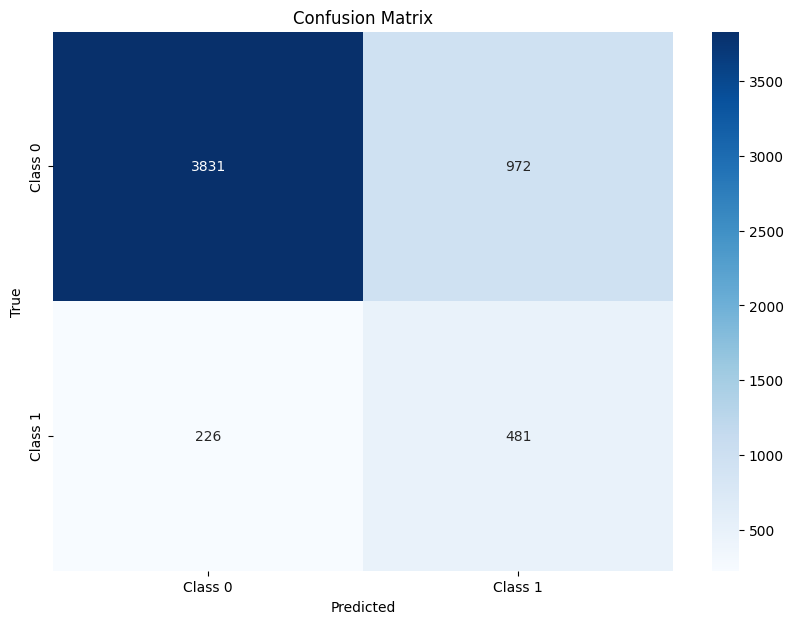

In [7]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv")
test_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv")

# Extract texts and labels
X = train_df['text'].values
y = train_df['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize texts
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])

# Pad sequences
max_len = 500  # Increased maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Extract test labels
y_test = test_df['label'].values

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define CNN model with the required modifications
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=1000, output_dim=128, input_length=max_len))  # Increased size to 128 for embedding
cnn_model.add(Conv1D(256, 5, activation='relu'))  # First Conv1D layer with 256 filters
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Conv1D(128, 5, activation='relu'))  # Second Conv1D layer with 128 filters
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))  # Single Dense layer with 256 units
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
cnn_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_val_padded, y_val), callbacks=[early_stopping], class_weight=class_weights_dict)

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_padded, y_test)
cnn_y_pred = cnn_model.predict(X_test_padded)
cnn_y_pred_classes = (cnn_y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, cnn_y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
cnn_report = classification_report(y_test, cnn_y_pred_classes, target_names=['Class 0', 'Class 1'])
print("CNN Model Classification Report:\n", cnn_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

